In [1]:
import pandas as pd
import seaborn as sb
import joblib
import matplotlib.pyplot as plt
import numpy as np
import truvari

In [2]:
data1 = joblib.load("s08_32x_stats.jl")
data1['coverage'] = '32x'
data2 = joblib.load("s08_16x_stats.jl")
data2['coverage'] = '16x'
data3 = joblib.load("s08_8x_stats.jl")
data3['coverage'] = '8x'

In [3]:
data = pd.concat([data1, data2, data3])

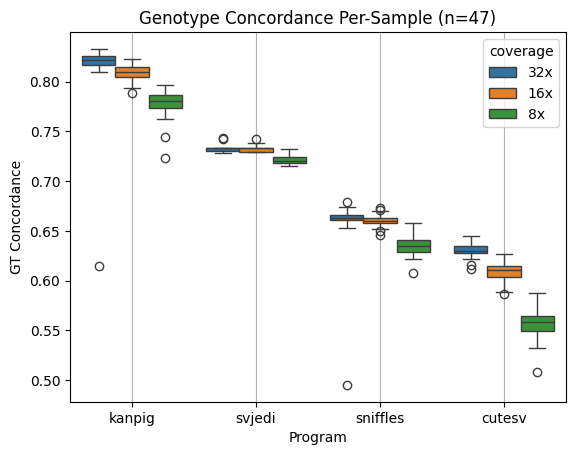

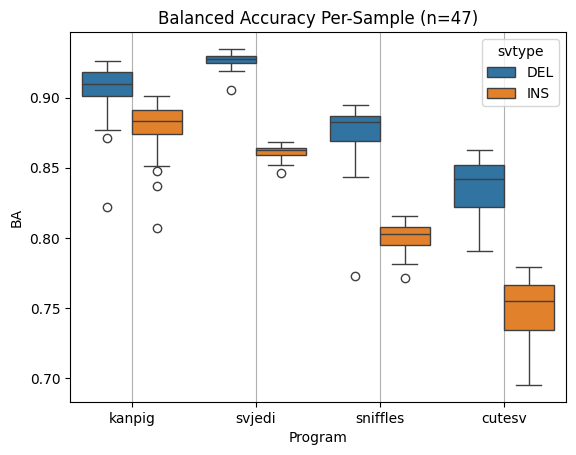

In [4]:
p = sb.boxplot(data=data[data['svtype'] == 'TOT'], x="Program", y="GT Concordance",
               hue="coverage", order=['kanpig', 'svjedi', 'sniffles', 'cutesv'], 
               hue_order=['32x', '16x', '8x'])
p.xaxis.grid(True)
p.set(title="Genotype Concordance Per-Sample (n=47)")
plt.show()

p = sb.boxplot(data=data[data['svtype'] != 'TOT'], x="Program", y="ba", 
           hue="svtype", order=['kanpig', 'svjedi', 'sniffles', 'cutesv'],
              hue_order=['DEL', 'INS'])
p.xaxis.grid(True)
p.set(title="Balanced Accuracy Per-Sample (n=47)", ylabel="BA")
plt.show()

In [5]:
in_data = joblib.load("s08_32x_gtmatrix.jl")

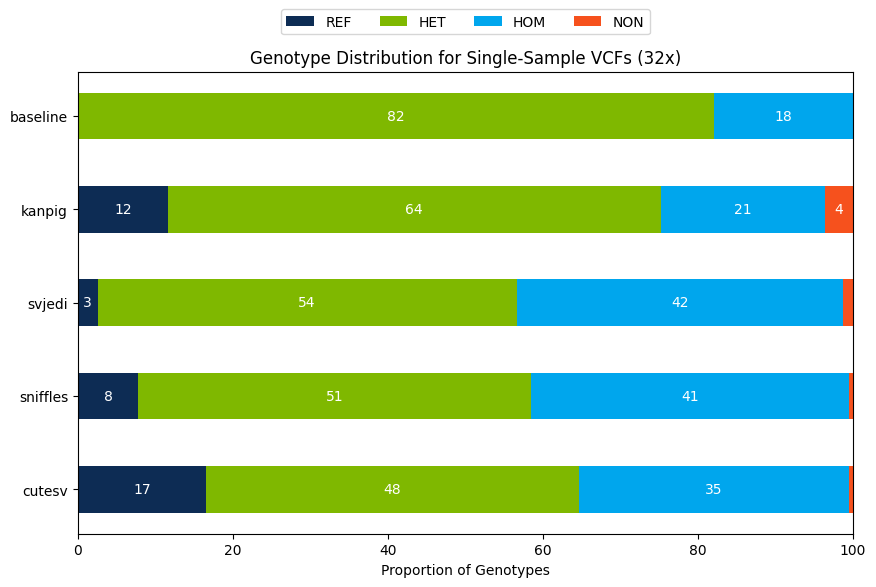

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from collections import OrderedDict

# Example data for different tests and observations
tests = ['cutesv', 'sniffles', 'svjedi', 'kanpig']

m_data = OrderedDict()

# Bottom up order

m_data[('cutesv', 'pac')] = in_data['cutesv']['pac'].sum(axis=0)[:4]
m_data[('sniffles', 'pac')] = in_data['sniffles']['pac'].sum(axis=0)[:4]
m_data[('svjedi', 'pac')] = in_data['svjedi']['pac'].sum(axis=0)[:4]
m_data[('kanpig', 'pac')] = in_data['kanpig']['pac'].sum(axis=0)[:4]
#m_data[('svjedi', 'pac')][3] -= 1049772 # This manual correction needs to be stopped

m_data[('baseline', '')] = in_data['sniffles']['pac'].sum(axis=1)[:4]
#data[('exbaseline', '')] = [17937331 , 1079127, 233567, 0]

# Normalize the data by percentages for each test and observation
normalized_data = OrderedDict()
y_labels = []
y_super = []
for key, counts in m_data.items():
    total = np.sum(counts)
    normalized_data[key] = (counts / total) * 100

    y_labels.append(key[0])
    if key[1] not in y_super:
        y_super.append(key[1])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.5
y_positions = np.arange(len(m_data))

# Define colors for each category
colors = ['#0D2C54', '#7FB800', '#00A6ED', '#F6511D']
categories = ['REF', 'HET', 'HOM', 'NON']

# Plot each test and observation
for i, ((test, observation), counts) in enumerate(normalized_data.items()):
    y_pos = i
    left = 0
    for j, (count, color, category) in enumerate(zip(counts, colors, categories)):
        ax.barh(y_pos, count, left=left, color=color, height=bar_width, label=category if y_pos == 0 else "")
        if count > 1.5:  # Only add text if the percentage is greater than 5
            ax.text(left + count / 2, y_pos, f'{count:.0f}', va='center', ha='center', color='white')
        left += count

# Adding labels and title
ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_xlabel('Proportion of Genotypes')
ax.set_title('Genotype Distribution for Single-Sample VCFs (32x)')

# Adjusting the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(categories)], labels[:len(categories)], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(categories))

plt.show()


# Num Neigh

In [7]:
neigh_data = joblib.load("s08_32x_neigh_stats.jl")

In [8]:
neigh_data

,index,Program,Technology,Concordant,Discordant,Missing,Filtered,TP,FP,TN,...,baseP,compN,baseN,ppv,tpr,tnr,npv,acc,ba,f1
0,0,sniffles,pac,11541,982,0,0,16225,691,7787,...,16568,8130,8478,0.959151,0.979297,0.918495,0.957811,0.958716,0.948896,2.0
1,1,sniffles,pac,2575,4563,0,0,6974,627,2666,...,10983,6675,3293,0.917511,0.634981,0.809596,0.399401,0.675259,0.722289,2.0
2,2,sniffles,pac,1208,1544,0,0,2516,434,1399,...,3671,2554,1833,0.852881,0.685372,0.763230,0.547768,0.711301,0.724301,2.0
3,3,sniffles,pac,1414,1513,0,0,2301,724,2019,...,3111,2829,2743,0.760661,0.739634,0.736055,0.713680,0.737957,0.737844,2.0
4,4,svjedi,pac,11947,561,0,0,16666,247,7761,...,17008,8103,8008,0.985396,0.979892,0.969156,0.957793,0.976455,0.974524,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,7,cutesv,pac,907,2397,0,0,1392,2019,2748,...,1841,3197,4767,0.408091,0.756111,0.576463,0.859556,0.626513,0.666287,2.0
592,8,kanpig,pac,12955,914,0,0,16821,842,9926,...,16970,10075,10768,0.952330,0.991220,0.921805,0.985211,0.964273,0.956513,2.0
593,9,kanpig,pac,5830,1972,0,0,6884,1254,6716,...,7634,7466,7970,0.845908,0.901755,0.842660,0.899545,0.871571,0.872208,2.0
594,10,kanpig,pac,2100,794,0,0,2486,576,2483,...,2729,2726,3059,0.811888,0.910956,0.811703,0.910858,0.858500,0.861330,2.0


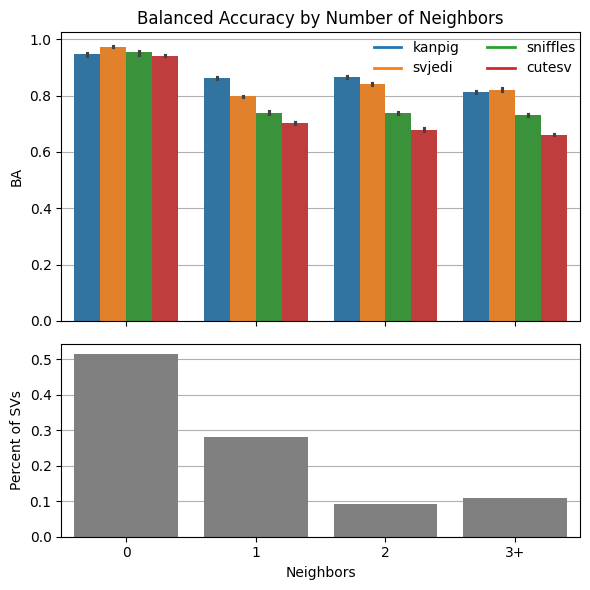

In [59]:

neigh_data = joblib.load("s08_32x_neigh_stats.jl")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6),
                              gridspec_kw={'height_ratios': [3, 2]})  # figsize is (width, height)

lineplot = sb.barplot(data=neigh_data.reset_index(), ax=ax1,
                       x="num_neigh", y="ba", 
                       hue="Program",
                      hue_order=['kanpig', 'svjedi', 'sniffles', 'cutesv'],
                     zorder=2)

hue_labels = ['kanpig', 'svjedi', 'sniffles', 'cutesv']
#styles = ['solid', 'dashed']
#style_labels = neigh_data['Technology'].unique()

# Get handles and labels for both hue and style
handles, _ = lineplot.get_legend_handles_labels()

# Create legend elements
hue_elements = [plt.Line2D([0], [0], color=sb.color_palette()[i], lw=2) for i in range(len(hue_labels))]
#style_elements = [plt.Line2D([0], [0], color='black', linestyle=styles[i], lw=2) for i in range(len(style_labels))]

# Combine elements
legend_elements = hue_elements #+ style_elements
legend_labels = list(hue_labels) #+ list(style_labels)

lineplot.set_xticks([0, 1, 2, 3])
lineplot.set_xticklabels(["0", "1", "2", "3+"])
lineplot.set(title="Balanced Accuracy by Number of Neighbors", xlabel="", ylabel="BA")
# Create custom legend
ax1.legend(legend_elements, legend_labels, title='', ncol=2, loc='upper right', 
           bbox_to_anchor=(1.015, 1.015), frameon=False)
ax1.grid(axis='y', zorder=1)

pct = neigh_data[(neigh_data['sample'] == 'HG00438') 
          & (neigh_data['Program'] == 'kanpig')][['num_neigh', 'Total Calls']]
pct['percent of calls'] = pct['Total Calls'] / pct['Total Calls'].sum()
hist = sb.barplot(data=pct, x="num_neigh", y="percent of calls", zorder=2, color='#808080')
hist.set(ylabel="Percent of SVs", xlabel="Neighbors")
ax2.grid(axis='y', zorder=1)
fig.tight_layout()



In [10]:
pct = neigh_data[(neigh_data['sample'] == 'HG00438') 
          & (neigh_data['Program'] == 'kanpig')][['num_neigh', 'Total Calls']]
pct['percent of calls'] = pct['Total Calls'] / pct['Total Calls'].sum()
pct

,num_neigh,Total Calls,percent of calls
20,0,12633,0.515485
21,1,6884,0.280899
22,2,2288,0.093361
23,3,2702,0.110254
